# **I. Giới thiệu bộ dữ liệu**

Import các thư viện cần

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, r2_score,  mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [80]:
data=pd.read_csv('ds_salaries.csv', index_col=0)
data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


tạo một dataframe dành riêng cho việc xây dựng mô hình dự đoán sau này

In [81]:
df = data.copy()

Kích thước bộ dữ liệu

In [82]:
data.shape

(607, 11)

Tên các cột trong bộ dữ liệu

In [83]:
print(data.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


Thông tin bộ dữ liệu

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


Kiểm tra giá trị thiếu

In [85]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Bảng mô tả thông tin

In [86]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
work_year,607.0,NaN,NaN,NaN,2021.405272,0.692133,2020.0,2021.0,2022.0,2022.0,2022.0
experience_level,607,4,SE,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,607,4,FT,588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,607,50,Data Scientist,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,607.0,NaN,NaN,NaN,324000.062603,1544357.486636,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_currency,607,17,USD,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_in_usd,607.0,NaN,NaN,NaN,112297.869852,70957.259411,2859.0,62726.0,101570.0,150000.0,600000.0
employee_residence,607,57,US,332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,607.0,NaN,NaN,NaN,70.92257,40.70913,0.0,50.0,100.0,100.0,100.0
company_location,607,50,US,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Chuyển các cột được viết tắt thành tên

In [87]:
data['experience_level'] = data['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate level',
})

data['employment_type'] = data['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})
data['company_size'] = data['company_size'].replace({
    'S': 'SMALL',
    'M': 'MEDIUM',
    'L' : 'LARGE',
})
data['remote_ratio'] = data['remote_ratio'].astype(str)
data['remote_ratio'] = data['remote_ratio'].replace({
    '0': 'On-Site',
    '50': 'Half-Remote',
    '100' : 'Full-Remote',
})

Hàm chuyển đổi mã quốc gia theo ISO 3166 thành tên:

In [88]:
!pip install pycountry -q
import pycountry

def country_code_to_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except:
        return country_code

def country_code_to_name(code):
    try:
        country = pycountry.countries.get(alpha_2=code)
        return country.name
    except:
        return None

data['company_location'] = data['company_location'].apply(country_code_to_name)
data['employee_residence'] = data['employee_residence'].apply(country_code_to_name)

**Xét số lượng mẫu của các thuộc tính có nhiều giá trị riêng biệt:**

Số lượng mẫu của các vị trí công việc:

In [89]:
data['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

Số lượng mẫu của các thuộc tính Company location và Employee Residence:

In [90]:
residence = data['company_location'].value_counts()
top10_company_location = residence[:10]
fig = px.bar(y=top10_company_location.values,
             x=top10_company_location.index,
             color = top10_company_location.index,
             color_discrete_sequence=px.colors.sequential.deep,
             text=top10_company_location.values,
             title= 'Xếp hạng quốc gia có nhiều công việc ngành khoa học dữ liệu nhất:',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Location of Employee",
    yaxis_title="count",
    font = dict(size=17,family="Times New Roman"))
fig.show()

In [91]:
residence = data['employee_residence'].value_counts()
top10_employee_location = residence[:10]
fig = px.bar(y=top10_employee_location.values,
             x=top10_employee_location.index,
             color = top10_employee_location.index,
             color_discrete_sequence=px.colors.sequential.deep,
             text=top10_employee_location.values,
             title= 'Xếp hạng quốc gia có nhiều nhân viên ngành khoa học dữ liệu nhất:',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Location of Employee",
    yaxis_title="count",
    font = dict(size=17,family="Times New Roman"))
fig.show()

có thể thấy bộ dữ liệu bị nghiêng nhiều về phía Mỹ ở hai thuộc tính này nên nhóm sẽ gom nhóm các quốc gia khác thành "other" khi xây dựng mô hình dự đoán

Trực quan hoá thuộc tính đích (price)

salary_in_usd: mu = 112297.87, sigma = 70898.79
salary_in_usd: Skewness: 1.67
salary_in_usd: Kurtosis: 6.35


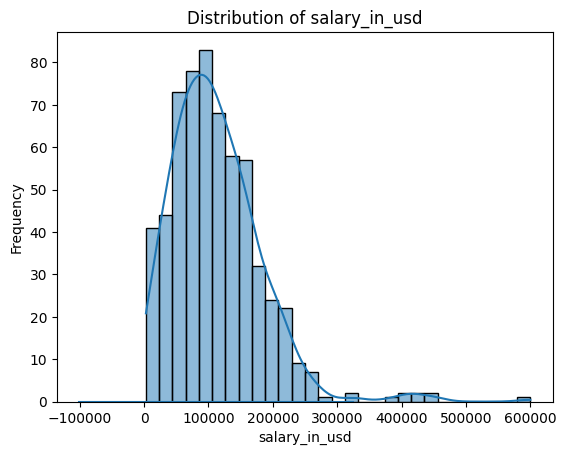

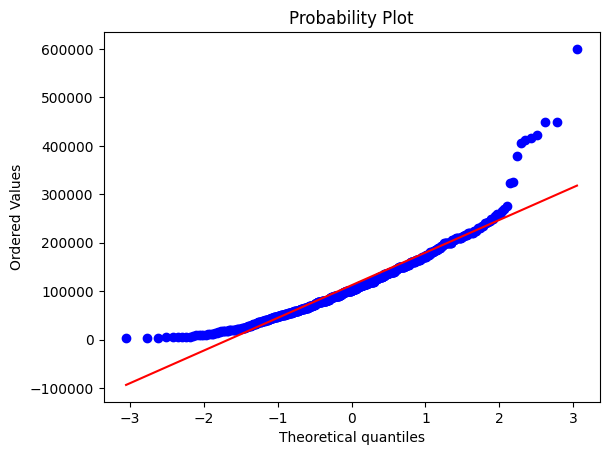

In [92]:
columns = ['salary_in_usd']
for col in columns:
    sns.histplot(data[col], kde=True)

    (mu, sigma) = stats.norm.fit(data[col])

    print('{}: mu = {:.2f}, sigma = {:.2f}'.format(col, mu, sigma))

    print('{}: Skewness: {:.2f}'.format(col, data[col].skew()))
    print('{}: Kurtosis: {:.2f}'.format(col, data[col].kurt()))

    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, y, label='Normal fit')

    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Distribution of {}'.format(col))

    fig = plt.figure()
    stats.probplot(data[col], plot=plt)

    plt.show()


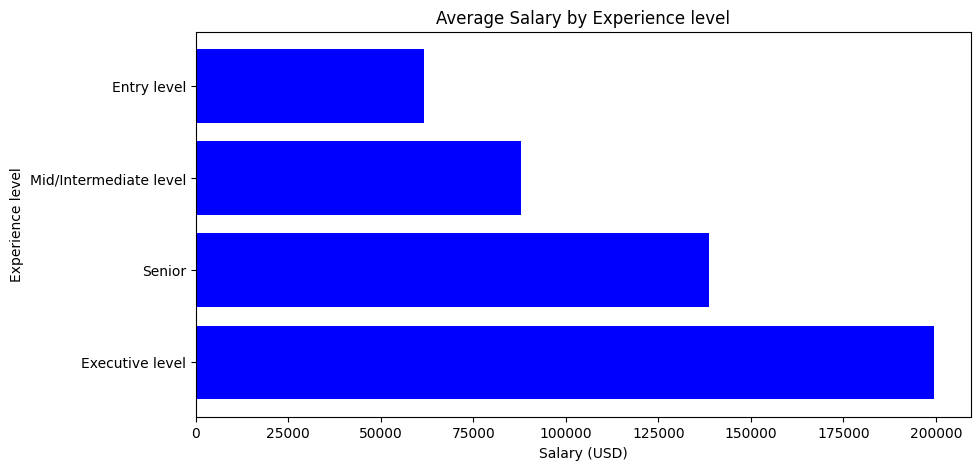

In [93]:
experience_level_salary = data.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
plt.barh(experience_level_salary.index, experience_level_salary.values, color='blue')
plt.title('Average Salary by Experience level')
plt.xlabel('Salary (USD)')
plt.ylabel('Experience level')
plt.show()

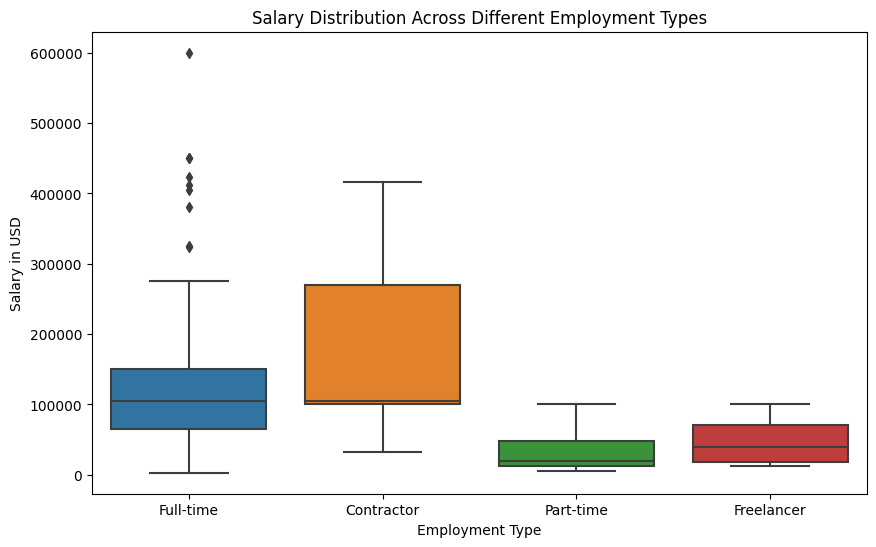

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='employment_type', y='salary_in_usd')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.show()

In [95]:
fig = px.box(data, x = 'remote_ratio', y = 'salary_in_usd', template = 'seaborn', color = 'remote_ratio',
            title = 'Salary in USD according to remote_ratio')
fig.show()
remote_ratio_average = data.groupby('remote_ratio')[['remote_ratio','salary_in_usd']].mean().sort_values('salary_in_usd', ascending=False)
remote_ratio_average.round(0)

<ipython-input-95-aa4b09363903>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,salary_in_usd
remote_ratio,
Full-Remote,122457.0
On-Site,106355.0
Half-Remote,80823.0


Trung bình lương (USD) theo năm:

In [96]:
print(data.groupby('work_year')['salary_in_usd'].mean())

work_year
2020     95813.000000
2021     99853.792627
2022    124522.006289
Name: salary_in_usd, dtype: float64


Mức lương (USD) các vị trí theo từng năm

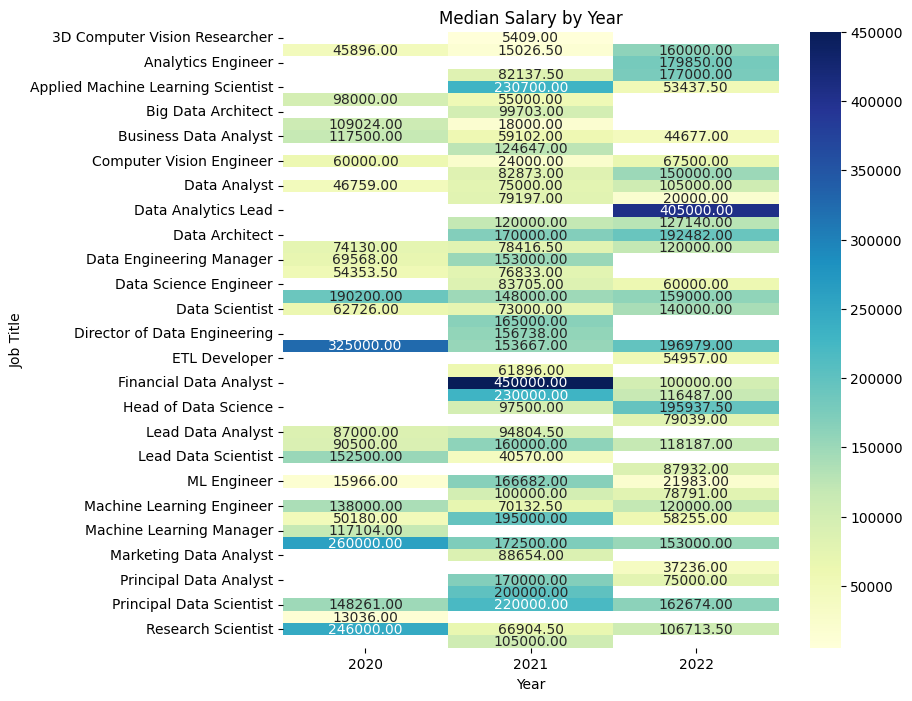

In [97]:
pivot_table = data.pivot_table(values='salary_in_usd', index='job_title', columns='work_year', aggfunc='median')
plt.figure(figsize=(8, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Median Salary by Year')
plt.xlabel('Year')
plt.ylabel('Job Title')
plt.show()

Trực quan hóa mức lương trung bình theo vị trí công ty

In [98]:
avg_salary_by_location = data.groupby('company_location', as_index = False)['salary_in_usd'].mean()

fig1 = px.choropleth(avg_salary_by_location,
                     locations='company_location',
                     locationmode='country names',
                     color='salary_in_usd',
                     hover_name='company_location',
                     color_continuous_scale = px.colors.sequential.Plasma,
                     title='Average Salary by Company Location',
                     labels={'salary_in_usd': 'Average Salary(USD)'},
                     projection='natural earth')

fig1.show()

Trực quan hóa mức lương trung bình theo nơi cư trú của nhân viên

In [99]:
avg_salary_by_location = data.groupby('company_location', as_index = False)['salary_in_usd'].mean()

fig2 = px.choropleth(avg_salary_by_location,
                     locations='company_location',
                     locationmode='country names',
                     color='salary_in_usd',
                     hover_name='company_location',
                     color_continuous_scale = px.colors.sequential.Plasma,
                     title='Average Salary by Company Location',
                     labels={'salary_in_usd': 'Average Salary(USD)'},
                     projection='natural earth')

fig2.show()

Mức độ liên quan giữa nơi cư trú của nhân viên và vị trí công ty đối với mức lương (USD)

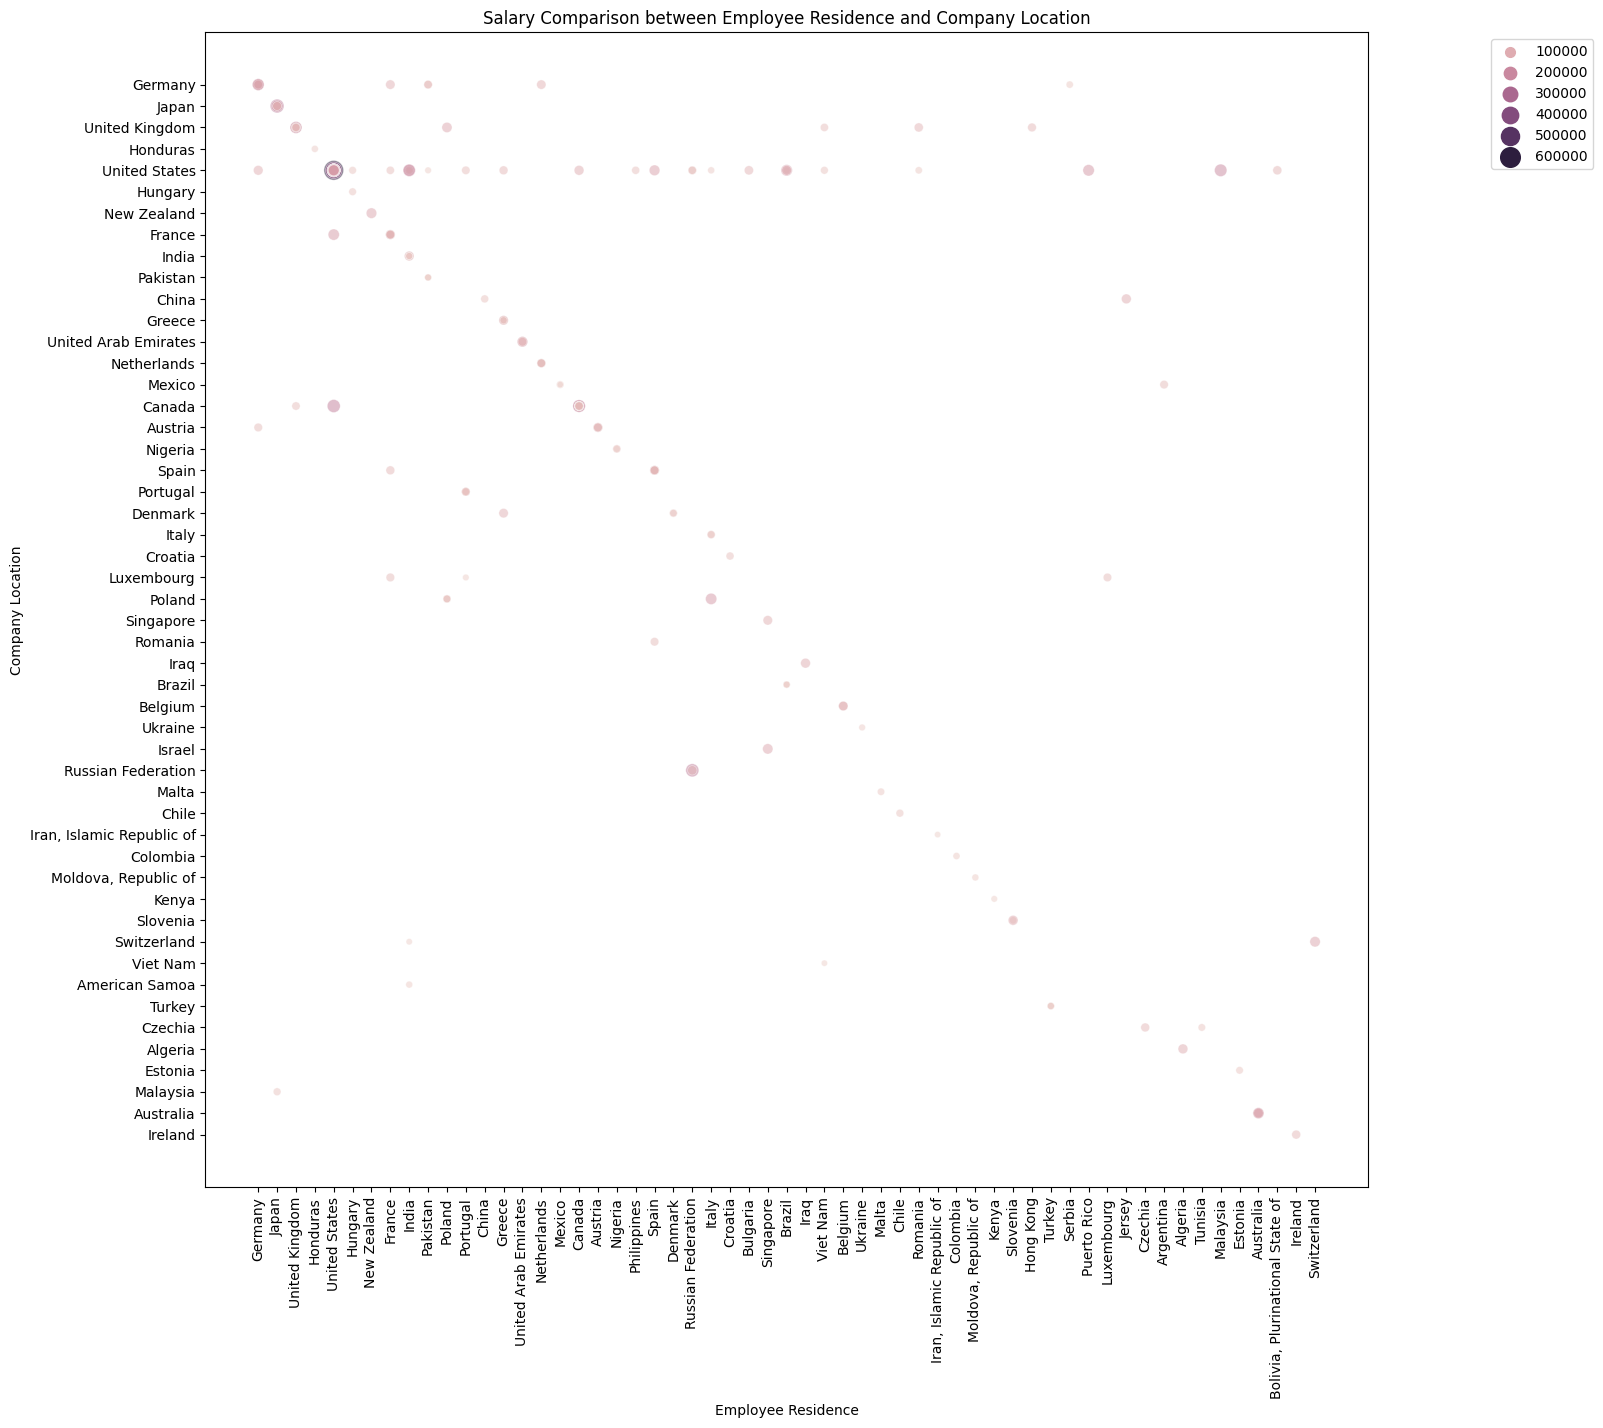

In [100]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data=data, x='employee_residence', y='company_location', hue='salary_in_usd', size='salary_in_usd', sizes=(20, 200), alpha=0.5)
plt.title('Salary Comparison between Employee Residence and Company Location')
plt.xlabel('Employee Residence')
plt.ylabel('Company Location')
plt.xticks(rotation=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

# **II. Xử lí dữ liệu**

Bỏ bớt cột không có giá trị trong dự đoán

In [101]:
df.drop('salary',axis=1,inplace=True)
df.drop('salary_currency',axis=1,inplace=True)

gán nhãn cho bộ dữ liệu

In [102]:
df['experience_level'] = LabelEncoder().fit_transform(df['experience_level'])
df['employment_type'] = LabelEncoder().fit_transform(df['employment_type'])
df['remote_ration'] = LabelEncoder().fit_transform(df['job_title'])
df['job_title'] = LabelEncoder().fit_transform(df['job_title'])
df['employee_residence'] = LabelEncoder().fit_transform(df['employee_residence'])
df['company_location'] = LabelEncoder().fit_transform(df['company_location'])
df['company_size'] = LabelEncoder().fit_transform(df['company_size'])

Dữ liệu sau khi gán nhãn:

In [103]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,remote_ration
0,2020,2,2,22,79833,14,0,12,0,22
1,2020,3,2,41,260000,32,0,29,2,41
2,2020,3,2,7,109024,20,50,18,1,7
3,2020,2,2,47,20000,23,0,20,2,47
4,2020,3,2,38,150000,55,50,48,0,38
5,2020,0,2,12,72000,55,100,48,0,12
6,2020,3,2,34,190000,55,100,48,2,34
7,2020,2,2,22,35735,25,50,22,0,22
8,2020,2,2,8,135000,55,100,48,0,8
9,2020,3,2,33,125000,41,50,38,2,33


<Axes: >

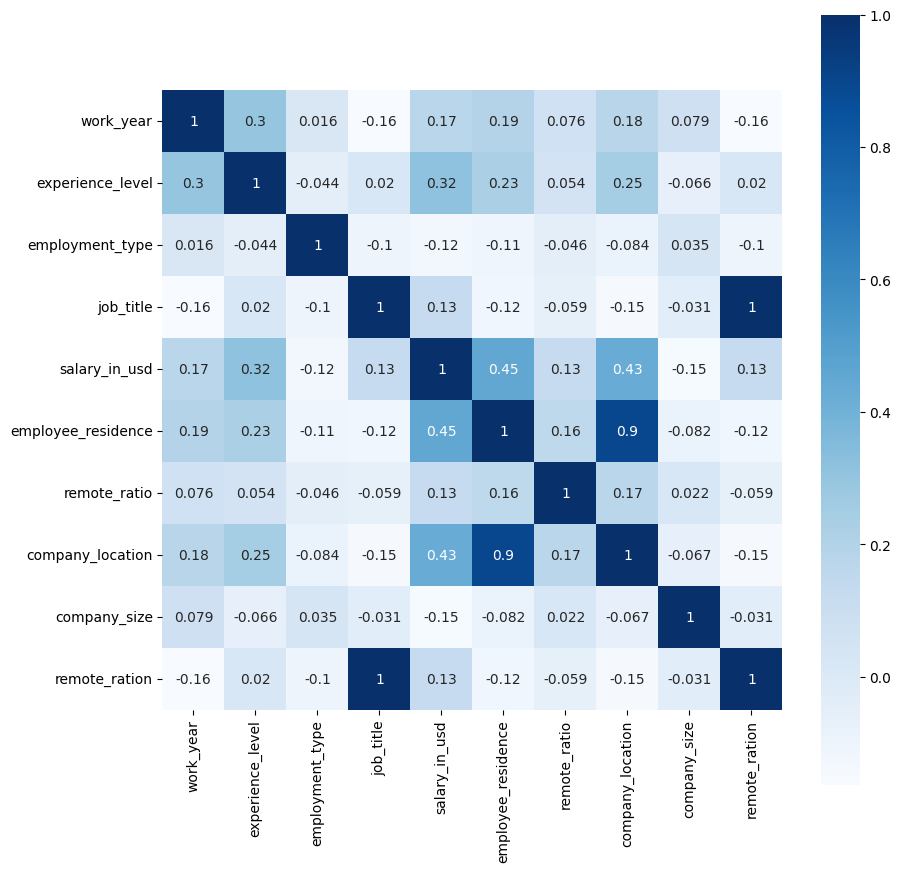

In [104]:
correlation = df.corr(method='pearson')
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

Sự phụ thuộc của thuộc tính hướng đến (salary_in_usd)

In [105]:
df.corr()['salary_in_usd'].sort_values()

company_size         -0.151205
employment_type      -0.123545
job_title             0.131016
remote_ration         0.131016
remote_ratio          0.132122
work_year             0.170493
experience_level      0.315312
company_location      0.428994
employee_residence    0.452501
salary_in_usd         1.000000
Name: salary_in_usd, dtype: float64

Ta thấy được giá trị tuyệt đối của các trường dữ liệu tương đối ổn. Nên nhóm quyết định giữ lại tất cả các trường dữ liệu này để xây dựng mô hình dự đoán.

In [106]:
X = df[['company_size', 'employee_residence','company_location','experience_level','work_year', 'job_title', 'remote_ratio', 'employment_type']].values
y = df['salary_in_usd'].values

Chia bộ dữ liệu thành 2 tập huấn luyện và kiểm tra. Vì bộ dữ liệu không cân bằng nên nhóm sẽ sử dụng phương pháp K-Fold Cross-validation để đánh giá hiệu suất mô hình trên các tập dữ liệu khác nhau.

In [107]:
kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state = 125)

Sử dụng GridSearchCV() để tìm siêu tham số phù hợp nhất:

In [108]:
param_grid_lg = {'fit_intercept': [True, False], 'copy_X': [True, False], 'positive': [True, False]}
param_grid_rf = {
    'n_estimators': [25, 50, 100, 200],
    'max_features': ['sqrt', 'log2']
}
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

model_lg = LinearRegression()
model_rf = RandomForestRegressor()
model_gb = GradientBoostingRegressor()

grid_search_lg = GridSearchCV(estimator = model_lg, param_grid = param_grid_lg, cv = 2)
grid_search_rf = GridSearchCV(estimator = model_rf, param_grid = param_grid_rf, cv = 2)
grid_search_gb = GridSearchCV(estimator = model_gb, param_grid = param_grid_gb, cv = 2)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    grid_search_lg.fit(X_train, y_train)
    grid_search_rf.fit(X_train, y_train)
    grid_search_gb.fit(X_train, y_train)

print(grid_search_lg.best_params_)
print(grid_search_rf.best_params_)
print(grid_search_gb.best_params_)

{'copy_X': True, 'fit_intercept': False, 'positive': True}
{'max_features': 'log2', 'n_estimators': 50}
{'max_depth': 3, 'n_estimators': 50}


# **III. Xây dựng mô hình dự đoán**

Dùng Multiple Linear Regression

In [109]:
lg_score = []
lg_mae = []
lg_mse = []
lg_rmse = []
for train_index, test_index in kf.split(X, y):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]

    model_lg = LinearRegression(copy_X = True, fit_intercept = False, positive = True)
    model_lg.fit(X_train, y_train)

    lg_pred = model_lg.predict(X_test)

    lg_score.append(model_lg.score(X_test,y_test))

    lg_mae.append(mean_absolute_error(y_test, lg_pred))
    lg_mse.append(mean_squared_error(y_test, lg_pred))
    lg_rmse.append(np.sqrt(mean_squared_error(y_test,lg_pred)))

print(lg_score)
print(lg_mae)
print(lg_mse)
print(lg_rmse)

[0.29644977513204906, 0.26693541553067723, 0.31223734755375143, 0.32871077007305316, 0.26059858309632267, 0.32183572974447405, 0.2736808451437571, 0.21371167994010254, 0.3083150663849793, 0.3030173650300104]
[35920.90829998008, 44351.88744783557, 41723.88806370115, 40672.54064451291, 39467.64930124794, 42664.09962766473, 42698.04501021218, 41451.87179349633, 39560.401047618936, 38417.54508692982]
[1982394358.2229776, 3944974360.9253316, 3664978984.14614, 2958081389.7164316, 3325521500.8367085, 3329725284.007567, 4416603920.493679, 3657806498.347939, 2558437287.2919607, 2629996593.2001343]
[44524.08739348823, 62809.03088669122, 60539.06989825777, 54388.246797598025, 57667.334781804406, 57703.77183518914, 66457.53471573918, 60479.802400040455, 50580.997294359084, 51283.49240447782]


Dùng Random Forest

In [110]:
rf_score = []
rf_mae = []
rf_mse = []
rf_rmse = []
for train_index, test_index in kf.split(X, y):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]

    model_rf = RandomForestRegressor(max_features = 'log2', n_estimators=50)
    model_rf.fit(X_train, y_train)

    rf_pred = model_rf.predict(X_test)

    rf_score.append(model_rf.score(X_test,y_test))

    rf_mae.append(mean_absolute_error(y_test, rf_pred))
    rf_mse.append(mean_squared_error(y_test, rf_pred))
    rf_rmse.append(np.sqrt(mean_squared_error(y_test,rf_pred)))

print(rf_score)
print(rf_mae)
print(rf_mse)
print(rf_rmse)

[0.34871023490064457, 0.39415983131302823, 0.4282074981607523, 0.5436780632973316, 0.3783623752489914, 0.6215343535204869, 0.5108465451168084, 0.495351571682242, 0.47573097257911523, 0.4665624095845443]
[31664.092150274922, 37087.849456996395, 33000.92840029212, 33109.36507725676, 33134.4007951532, 30689.836713525106, 33612.7946387242, 31724.297751722675, 32189.819172636744, 34390.98474647117]
[1835139994.6516385, 3260318371.5647073, 3046992294.622986, 2010813474.2850251, 2795868711.6065483, 1858232123.813125, 2974445947.233389, 2347620145.6752567, 1939191332.8452394, 2012875178.0708919]
[42838.5339927925, 57099.197643791, 55199.56788438643, 44842.0948917981, 52875.97480526055, 43107.21660943936, 54538.48134329914, 48452.246033339434, 44036.25021326452, 44865.077488742754]


Dùng Gradient boosting

In [111]:
gb_score = []
gb_mae = []
gb_mse = []
gb_rmse = []
for train_index, test_index in kf.split(X, y):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]

    model_gb = GradientBoostingRegressor(max_depth = 3, n_estimators = 50)
    model_gb.fit(X_train, y_train)

    gb_pred = model_gb.predict(X_test)

    gb_score.append(model_gb.score(X_test,y_test))

    gb_mae.append(mean_absolute_error(y_test, gb_pred))
    gb_mse.append(mean_squared_error(y_test, gb_pred))
    gb_rmse.append(np.sqrt(mean_squared_error(y_test,gb_pred)))

print(gb_score)
print(gb_mae)
print(gb_mse)
print(gb_rmse)

[0.11479065240549469, 0.36437368676208604, 0.3989123883483052, 0.6031039638901318, 0.34480095964694135, 0.6166415393628608, 0.4900497716457629, 0.48345686784598474, 0.3416763100026454, 0.49736258995032123]
[35021.12599109357, 37661.91767659936, 35287.88083037901, 32055.302570572647, 34537.508879801746, 32025.68745742139, 32980.19370936457, 32659.087185883134, 35191.35103847565, 32787.686211169064]
[2494255498.0306544, 3420611992.418519, 3203101326.4510307, 1748949224.4596095, 2946814066.3646035, 1882255399.1833525, 3100907036.179911, 2402954205.5591316, 2435039125.1030273, 1896653675.0266576]
[49942.52194303622, 58485.998259570806, 56595.947968481196, 41820.440270992, 54284.56563669459, 43384.96743324066, 55685.78845791726, 49019.93681716789, 49346.11560298366, 43550.58753939673]


# **IV. Kết quả dự đoán**

Tìm trung bình các độ đo của các mô hình rồi đưa vào 1 DataFrame

In [112]:
from numpy.ma.extras import median
import statistics
mean_lg_score = median(lg_score)
mean_rf_score = median(rf_score)
mean_gb_score = median(gb_score)
mean_mae_lg = median(lg_mae)
mean_mae_rf = median(rf_mae)
mean_mae_gb = median(gb_mae)
mean_mse_lg = median(lg_mse)
mean_mse_rf = median(rf_mse)
mean_mse_gb = median(gb_mse)
mean_rmse_lg = median(lg_rmse)
mean_rmse_rf = median(rf_rmse)
mean_rmse_gb = median(gb_rmse)
models_score = pd.DataFrame({'Model':['Multiple Linear Regression','Random Forest Regression','Gradient Boosting'],
                             'Score':['%f%%' %(mean_lg_score*100), '%f%%' %(mean_rf_score*100), '%f%%' %(mean_gb_score*100)],
                             'MAE' : [mean_mae_lg, mean_mae_rf, mean_mae_gb],
                             'MSE' : [mean_mse_lg, mean_mse_rf, mean_mse_gb],
                             'RMSE' : [mean_rmse_lg, mean_rmse_rf, mean_rmse_gb],
                           })
models_score

,Model,Score,MAE,MSE,RMSE
0,Multiple Linear Regression,29.973357%,41062.206219,3.327623e+09,57685.553308
1,Random Forest Regression,47.114669%,33055.146739,2.180248e+09,46658.661761
2,Gradient Boosting,44.118463%,33758.851295,2.464647e+09,49644.318773


Có thể thấy 2 mô hình Random Forest và Gradient Boosting phù hợp nhất với bộ dữ liệu trên, với mức accuracy xấp xỉ 47% và 44%.

Đồ thị sai số và các độ đo sai số của từng mô hình:

-  Multiple Linear Regression

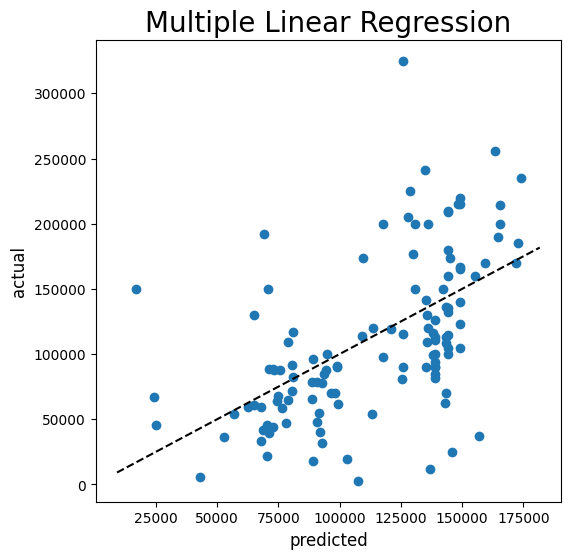

In [113]:
y_pred_lg = model_lg.predict(X_test)
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('Multiple Linear Regression',fontsize=20)
ax.set_xlabel('predicted',fontsize=12)
ax.set_ylabel('actual',fontsize=12)
ax.scatter(y_pred_lg,y_test)


x = y = np.linspace(*ax.get_xlim())
ax.plot(x, y, color='black', linestyle='--')

- Random forest

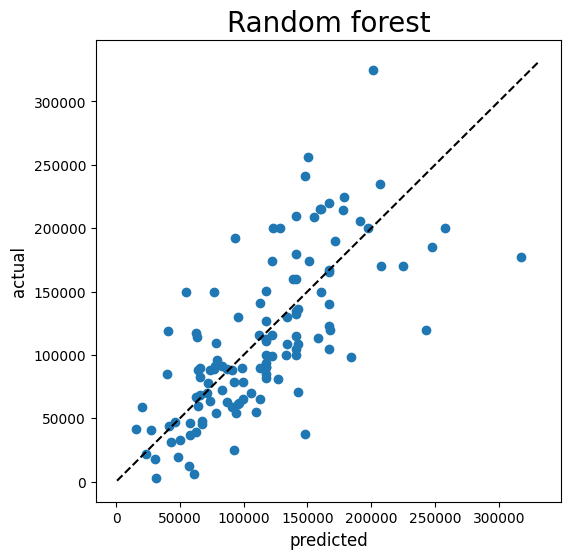

In [114]:
y_pred_rf = model_rf.predict(X_test)
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('Random forest',fontsize=20)
ax.set_xlabel('predicted',fontsize=12)
ax.set_ylabel('actual',fontsize=12)
ax.scatter(y_pred_rf,y_test)


x = y = np.linspace(*ax.get_xlim())
ax.plot(x, y, color='black', linestyle='--')

- Gradient Boosting

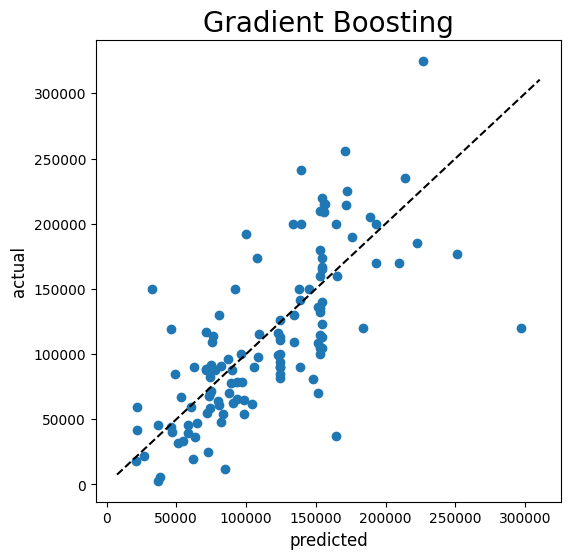

In [115]:
y_pred_gb = model_gb.predict(X_test)
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('Gradient Boosting',fontsize=20)
ax.set_xlabel('predicted',fontsize=12)
ax.set_ylabel('actual',fontsize=12)
ax.scatter(y_pred_gb,y_test)


x = y = np.linspace(*ax.get_xlim())
ax.plot(x, y, color='black', linestyle='--')